In [1]:
from operator import add
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
#from gatspy.periodic import LombScargleFast
from functools import partial
from gatspy import periodic
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from multiprocessing import Pool
import numpy as np
import os
#from sqlite3 import *
import random
from random import shuffle
from random import randint

In [2]:
#conn = connect('minion_1016_sqlite.db')
#conn = connect('astro_lsst_01_1004_sqlite.db')
#conn = connect('minion_1020_sqlite.db')

In [3]:
# LSST zero points  u,g,r,i,z,y
zeroPoints = [0,26.5,28.3,28.13,27.79,27.4,26.58]
FWHMeff = [0.8,0.92,0.87,0.83,0.80,0.78,0.76] # arcmins?
pixelScale = 0.2
readOut = 12.7
sigSys = 0.005
flareperiod = 4096
flarecycles = 10
dayinsec=86400
background = 40
# sat mag u,g,r,i,z,y=14.7,15.7,15.8,15.8,15.3 and 13.9
# start date 59580.033829 end date + 10 years
#maglist=[20]*7

In [4]:
looooops = 5
maglength = 20
freqlength = 20
processors = 7

In [5]:
#minion
#obs = [[59616.299504000002, 59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59666.409095000003, 59666.410887999999, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59678.188327000003, 59679.188063000001, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59682.108, 59682.115618999997, 59688.361971999999, 59688.381748, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59701.081133, 59701.089132000001, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59720.039016000002, 59720.131756000002, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004, 59728.030495999999, 59728.033172000003, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59751.009136000001, 59752.999348999998, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59784.020849, 59784.196575000002, 59784.226672999997, 59785.116557000001, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59728.030495999999, 59728.033172000003, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59785.116557000001], [59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59751.009136000001, 59752.999348999998, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59701.081133, 59701.089132000001, 59720.039016000002, 59720.131756000002, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59784.020849, 59784.196575000002, 59784.226672999997], [59616.299504000002, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997], [59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59678.188327000003, 59679.188063000001, 59688.361971999999, 59688.381748, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004], [59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59666.409095000003, 59666.410887999999, 59682.108, 59682.115618999997]]

In [6]:
#astro
obs = [[59669.401036000003, 59669.415071000003, 59675.397819999998, 59677.415775000001, 59680.223431999999, 59680.237016999999, 59680.393256000003, 59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59691.311783999998, 59691.326623000001, 59697.201801000003, 59697.226375999999, 59704.123689, 59704.137447000001, 59713.211079000001, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 59729.068837999999, 59729.093142999998, 59751.027583000003, 59751.049007000001, 59757.138006000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59777.082416999998, 59777.102072000001, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 59791.009824000001, 59801.005361000003, 59801.073385999996, 59809.074531999999, 59809.086860000003, 59818.017253999999, 59830.021194000001, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60023.375708, 60027.276451999998, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60036.318089, 60036.346084999997, 60037.228949999997, 60037.233992000001, 60037.373957000003, 60037.394174000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60050.276508000003, 60050.298390000004, 60051.194966000003, 60055.180418999997, 60055.200091999999, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60066.164306999999, 60066.184649000003, 60070.175371999998, 60070.187576999997, 60077.210695000002, 60077.226862000003, 60080.142302, 60091.154763999999, 60091.176958999997, 60096.061420999999, 60096.078866999997, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60128.986486000002, 60129.092213999997, 60130.968904000001, 60131.001272000001, 60138.072592999997, 60138.089612999996, 60138.958729999998, 60138.970401999999, 60142.029265999998, 60142.043682000003, 60162.143162, 60162.163673000003, 60166.118167000001, 60166.127850999997, 60169.057130000001, 60179.031756999997, 60179.044825999998, 60184.074436000003, 60184.088114999999, 60196.034555999999, 60200.038926000001, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61116.299725999997, 61116.309694000003, 61117.308653, 61117.331833999997, 61121.261482000002, 61121.276405999997, 61122.247755999997, 61122.270722000001, 61125.246002, 61125.258173000002, 61146.195286000002, 61146.204263, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61168.343100999999, 61168.360527999997, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61194.299290000003, 61198.183609, 61198.202326999999, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61222.212052000003, 61222.235246999997, 61223.976030999998, 61223.99267, 61225.270942000003, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61234.024741000001, 61242.011206000003, 61242.027925000002, 61250.978001000003, 61251.001197999998, 61263.049292000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61308.049478000001, 61314.024559999998, 61314.040779000003, 61457.371571000003, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61468.329055000002, 61468.349443999999, 61472.339615999997, 61473.297693, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61482.353294, 61482.369771999998, 61485.302841999997, 61487.28716, 61498.254727, 61500.234777999998, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61515.222293999999, 61515.242032000002, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61524.316500000001, 61524.334358, 61526.143040000003, 61526.158313, 61529.144471, 61529.153075000002, 61535.190121, 61535.203748, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61551.275856, 61551.291928999999, 61553.077337000002, 61553.094985999996, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61576.204814999997, 61576.223758, 61579.021372000003, 61579.035147000002, 61579.178869000003, 61579.194248, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61587.991277000001, 61594.974951999997, 61594.993855000001, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61818.385349999997, 61823.371563000001, 61825.345780000003, 61825.358432000001, 61831.360010999997, 61831.377608000003, 61836.370679, 61836.386992, 61837.319846999999, 61837.333532999997, 61840.293000999998, 61840.310907999999, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61853.273294999999, 61853.294459999997, 61855.264411999997, 61855.281715999998, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61880.202315000002, 61880.220170000001, 61883.302288999999, 61884.188242999997, 61884.20768, 61888.161372000002, 61888.172133, 61888.177112999998, 61890.193804000002, 61890.219878000004, 61891.176502000002, 61891.190996999998, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 61911.101354999999, 61911.121593999997, 61919.065248999999, 61919.082111999996, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61944.009872000002, 61944.023482999997, 61975.970884000002, 61977.961220999998, 61990.022662000003, 61990.033308999999, 61990.969071, 61991.008371999997, 62014.081587000001, 62029.983668000001, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62181.374238999997, 62182.367337999996, 62183.360256, 62186.365560999999, 62186.379598, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62204.338451000003, 62204.365867, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62212.274963000003, 62212.287948999998, 62213.285864999998, 62213.306700000001, 62219.256890999997, 62219.267795, 62223.241082, 62223.246038999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62235.210424999997, 62235.228042000002, 62236.20822, 62238.248929000001, 62238.268077000001, 62241.211341000002, 62241.218096999997, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62248.194274000001, 62248.204657000002, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62268.122880000003, 62268.129644000001, 62272.098738000001, 62272.110978999997, 62280.088317000002, 62280.107866999999, 62283.160799999998, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62310.012877000001, 62314.054224, 62323.028632000001, 62323.048261000004, 62323.988273000003, 62324.003357000001, 62324.955743999999, 62345.012896, 62350.057391000002, 62350.075546, 62350.996397000003, 62351.013322999999, 62354.984272000002, 62355.989008999997, 62362.084443, 62362.111626999998, 62370.008264999997, 62370.026551000003, 62391.000625000001, 62391.017884000001, 62399.080485999999, 62547.357983000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62550.391247, 62552.342559999997, 62552.35871, 62553.376311, 62553.392919999998, 62555.367782000001, 62562.328599, 62563.314242, 62563.325872000001, 62564.311908000003, 62564.332610999998, 62565.378089999998, 62566.307476000002, 62572.319470000002, 62572.334019000002, 62579.283603999997, 62579.289083999996, 62579.304375, 62583.363942999997, 62583.386175, 62593.229937999997, 62594.234393999999, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62606.214210999999, 62606.232379000001, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62614.276168999997, 62614.289700000001, 62614.40524, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62617.184884000002, 62617.201126, 62619.158406000002, 62619.172734, 62625.132279999998, 62625.149214999998, 62628.238909, 62628.262873, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62679.019597999999, 62679.035258000004, 62680.994428999998, 62680.998517, 62682.975467999997, 62682.993563999997, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62710.021248999998, 62725.122134999998, 62739.000661999999, 62739.020772999997, 62746.071468000002, 62746.091383999999, 62767.044696999998, 62767.057416000003, 62786.989026000003, 62787.012288999998, 62907.389675999999, 62910.355684000002, 62917.357602999997, 62918.341564000002, 62918.361992999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62926.395677, 62929.382726000003, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62942.289886999999, 62942.307116000004, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62948.267722999997, 62948.283458999998, 62950.266599000002, 62952.263092000001, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 62964.286281000001, 62964.306131999998, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63008.082414999997, 63008.096201, 63013.110240000002, 63013.130654000001, 63019.096136, 63020.122412999997, 63021.055490999999, 63033.026432999999, 63033.030551000003, 63043.991292999999, 63044.008430000002, 63047.046110000003, 63047.063009999998, 63051.185763000001, 63052.153337000003, 63052.174461000002, 63067.027063000001, 63067.049218, 63075.972807999999, 63079.058826, 63081.140289000003, 63081.159926, 63083.087984999998, 63083.115440000001, 63093.993697999998, 63108.068511999998, 63113.043817999998, 63117.002920999999, 63117.024508000002, 63123.996573999997], [59757.138006000001, 59791.009824000001, 59818.017253999999, 60027.276451999998, 60051.194966000003, 60080.142302, 60169.057130000001, 60200.038926000001, 61116.299725999997, 61116.309694000003, 61146.195286000002, 61146.204263, 61234.024741000001, 61263.049292000003, 61472.339615999997, 61473.297693, 61498.254727, 61500.234777999998, 61529.144471, 61529.153075000002, 61587.991277000001, 61823.371563000001, 61883.302288999999, 61888.161372000002, 61888.172133, 61888.177112999998, 62181.374238999997, 62183.360256, 62236.20822, 62241.211341000002, 62241.218096999997, 62268.122880000003, 62268.129644000001, 62355.989008999997, 62562.328599, 62566.307476000002, 62593.229937999997, 62594.234393999999, 62680.994428999998, 62680.998517, 62710.021248999998, 62917.357602999997, 62950.266599000002, 62952.263092000001, 63033.026432999999, 63033.030551000003, 63093.993697999998], [59697.201801000003, 59697.226375999999, 59751.027583000003, 59751.049007000001, 60050.276508000003, 60050.298390000004, 60077.210695000002, 60077.226862000003, 60142.029265999998, 60142.043682000003, 60196.034555999999, 61223.976030999998, 61223.99267, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61314.024559999998, 61314.040779000003, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61535.190121, 61535.203748, 61553.077337000002, 61553.094985999996, 61825.345780000003, 61825.358432000001, 61855.264411999997, 61855.281715999998, 61880.202315000002, 61880.220170000001, 61884.188242999997, 61884.20768, 61919.065248999999, 61919.082111999996, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62235.210424999997, 62235.228042000002, 62272.098738000001, 62272.110978999997, 62362.084443, 62362.111626999998, 62564.311908000003, 62564.332610999998, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62625.132279999998, 62625.149214999998, 62739.000661999999, 62739.020772999997, 62948.267722999997, 62948.283458999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 63117.002920999999, 63117.024508000002], [59675.397819999998, 59704.123689, 59704.137447000001, 59729.068837999999, 59729.093142999998, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 60023.375708, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60055.180418999997, 60055.200091999999, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60162.143162, 60162.163673000003, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61121.261482000002, 61121.276405999997, 61125.246002, 61125.258173000002, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61198.183609, 61198.202326999999, 61242.011206000003, 61242.027925000002, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61524.316500000001, 61524.334358, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61579.021372000003, 61579.035147000002, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61831.360010999997, 61831.377608000003, 61837.319846999999, 61837.333532999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61853.273294999999, 61853.294459999997, 61891.176502000002, 61891.190996999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 62182.367337999996, 62186.365560999999, 62186.379598, 62204.338451000003, 62204.365867, 62213.285864999998, 62213.306700000001, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62323.988273000003, 62324.003357000001, 62345.012896, 62350.996397000003, 62351.013322999999, 62547.357983000002, 62563.314242, 62563.325872000001, 62565.378089999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62619.158406000002, 62619.172734, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62679.019597999999, 62679.035258000004, 62767.044696999998, 62767.057416000003, 62918.341564000002, 62918.361992999999, 62942.289886999999, 62942.307116000004, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 63013.110240000002, 63013.130654000001, 63043.991292999999, 63044.008430000002, 63113.043817999998], [59680.223431999999, 59680.237016999999, 59680.393256000003, 59691.311783999998, 59691.326623000001, 59777.082416999998, 59777.102072000001, 59809.074531999999, 59809.086860000003, 60036.318089, 60036.346084999997, 60037.373957000003, 60037.394174000001, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60091.154763999999, 60091.176958999997, 60138.072592999997, 60138.089612999996, 60166.118167000001, 60166.127850999997, 60179.031756999997, 60179.044825999998, 61117.308653, 61117.331833999997, 61122.247755999997, 61122.270722000001, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61168.343100999999, 61168.360527999997, 61225.270942000003, 61468.329055000002, 61468.349443999999, 61482.353294, 61482.369771999998, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61526.143040000003, 61526.158313, 61551.275856, 61551.291928999999, 61579.178869000003, 61579.194248, 61836.370679, 61836.386992, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61890.193804000002, 61890.219878000004, 61911.101354999999, 61911.121593999997, 61944.009872000002, 61944.023482999997, 61990.022662000003, 61990.033308999999, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62212.274963000003, 62212.287948999998, 62219.256890999997, 62219.267795, 62238.248929000001, 62238.268077000001, 62248.194274000001, 62248.204657000002, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62323.028632000001, 62323.048261000004, 62350.057391000002, 62350.075546, 62391.000625000001, 62391.017884000001, 62572.319470000002, 62572.334019000002, 62614.276168999997, 62614.289700000001, 62614.40524, 62617.184884000002, 62617.201126, 62628.238909, 62628.262873, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62682.975467999997, 62682.993563999997, 62746.071468000002, 62746.091383999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62929.382726000003, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 63008.082414999997, 63008.096201, 63067.027063000001, 63067.049218, 63083.087984999998, 63083.115440000001], [59669.401036000003, 59669.415071000003, 59677.415775000001, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60066.164306999999, 60066.184649000003, 60096.061420999999, 60096.078866999997, 60130.968904000001, 60131.001272000001, 60138.958729999998, 60138.970401999999, 60184.074436000003, 60184.088114999999, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61222.212052000003, 61222.235246999997, 61250.978001000003, 61251.001197999998, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61515.222293999999, 61515.242032000002, 61576.204814999997, 61576.223758, 61594.974951999997, 61594.993855000001, 61818.385349999997, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61990.969071, 61991.008371999997, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62280.088317000002, 62280.107866999999, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62324.955743999999, 62370.008264999997, 62370.026551000003, 62399.080485999999, 62550.391247, 62553.376311, 62553.392919999998, 62583.363942999997, 62583.386175, 62606.214210999999, 62606.232379000001, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62786.989026000003, 62787.012288999998, 62926.395677, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62964.286281000001, 62964.306131999998, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63047.046110000003, 63047.063009999998, 63052.153337000003, 63052.174461000002, 63081.140289000003, 63081.159926, 63123.996573999997], [59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59713.211079000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59801.005361000003, 59801.073385999996, 59830.021194000001, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60037.228949999997, 60037.233992000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60070.175371999998, 60070.187576999997, 60128.986486000002, 60129.092213999997, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61194.299290000003, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61308.049478000001, 61457.371571000003, 61485.302841999997, 61487.28716, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61840.293000999998, 61840.310907999999, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61975.970884000002, 61977.961220999998, 62014.081587000001, 62029.983668000001, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62223.241082, 62223.246038999998, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62283.160799999998, 62310.012877000001, 62314.054224, 62354.984272000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62552.342559999997, 62552.35871, 62555.367782000001, 62579.283603999997, 62579.289083999996, 62579.304375, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62725.122134999998, 62907.389675999999, 62910.355684000002, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 63019.096136, 63020.122412999997, 63021.055490999999, 63051.185763000001, 63075.972807999999, 63079.058826, 63108.068511999998]]

In [7]:
len(obs[5])

130

In [8]:
def magUncertainy(Filter, objectmag, exposuretime,background, FWHM): # b is background counts per pixel   
    countsPS = 10**((Filter-objectmag)/2.5)
    counts = countsPS * exposuretime
    uncertainty = 1/(counts/((counts/2.3)+(((background/2.3)+(12.7**2))*2.266*((FWHM/0.2)**2)))**0.5) # gain assumed to be 1
    return uncertainty
#from lsst should have got the website! https://smtn-002.lsst.io/

In [9]:
def averageFlux(observations, Frequency, exptime):
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    return c

def Flux(observations,Frequency,exptime):
    a = [np.sin((2*np.pi*(Frequency)*x)) for x in observations]
    return a

In [10]:
def ellipsoidalFlux(observations, Frequency,exptime):
    period = 1/(Frequency)
    phase = [(x % (2*period)) for x in observations]
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    
    for x in range(0,len(phase)):
        if (phase[x]+(1.5*period)) < (3*period):
            c[x] = c[x]*(1./3.)
        else:
            c[x] = c[x]*(2./3.)
    return c
## this is doing something but not the right something, come back to it 

In [11]:
def flaring(B, length, dayinsec=86400,amplitude=1):   
    global flareMag, minutes
    fouriers = np.linspace(0.00001,0.05,(dayinsec/30))
    logF = [np.log(x) for x in fouriers] # start at 30 go to a day in 30 sec increments
    real = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers] #random.gauss(mu,sigma) to change for values from zurita
    # imaginary = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers]
    IFT = np.fft.ifft(real)
    seconds = np.linspace(0,dayinsec, (dayinsec/30)) # the day in 30 sec increments
    minutes = [x for x in seconds]
    minimum = (np.max(-IFT))
    positive = [x + minimum for x in IFT] # what did this even achieve? it helped with normalisation!
    normalised = [x/(np.mean(positive)) for x in positive] # find normalisation
    normalisedmin = minimum/(np.mean(positive))
    normalised = [x - normalisedmin for x in normalised]
    flareMag = [amplitude * x for x in normalised] # normalise to amplitude
    logmins = [np.log(d) for d in minutes] # for plotting?
#     plt.plot(minutes,flareMag)
#     plt.title('lightcurve')
#     plt.show()
    return flareMag

In [16]:
def lombScargle(frequencyRange,objectmag=20,loopNo=looooops,df=0.001,fmin=0.001,numsteps=100000,modulationAmplitude=0.1,Nquist=200): # frequency range and object mag in list
    #global totperiod, totmperiod, totpower, date, amplitude, frequency, periods, LSperiod, power, mag, error, SigLevel
    results = {}
    totperiod = []
    totmperiod = []
    totpower = [] # reset
    SigLevel = []
    filterletter = ['o','u','g','r','i','z','y']
    
    period = 1/(frequencyRange)
    if period > 0.5:
        numsteps = 10000
    elif period > 0.01:
        numsteps = 100000
    else:
        numsteps = 200000
    freqs = fmin + df * np.arange(numsteps) # for manuel
    allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy = [], [], [], [], [], [], [] #reset
    measuredpower = [] # reset
    y = [allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy] # for looping only
    for z in range(1, len(y)):
        #y[z] = averageFlux(obs[z], frequencyRange[frange], 30)  # amplitde calculation for observations, anf frequency range
        y[z] = ellipsoidalFlux(obs[z], frequencyRange,30)
        y[z] = [modulationAmplitude * t for t in y[z]] # scaling
        for G in range(0, len(y[z])):
            flareMinute = int(round((obs[z][G]*24*60*2)%((dayinsec/(30*2))*flarecycles)))
            y[z][G] = y[z][G] + longflare[flareMinute] # add flares swapped to second but not changing the name intrtoduces fewer bugs
    date = []
    amplitude = []
    mag = []
    error = []
    filts = []
    for z in range(1, len(y)):
        #date.extend([x for x in obs[z]])
        date.extend(obs[z])
        amplitude = [t + random.gauss(0,magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])) for t in y[z]] # scale amplitude and add poisson noise
        mag.extend([objectmag - t for t in amplitude]) # add actual mag
        error.extend([sigSys + magUncertainy(zeroPoints[z],objectmag,30,background,FWHMeff[z])]*len(amplitude))
        filts.extend([filterletter[z]]*len(amplitude))
        
#         phase = [(day % (period*2))/(period*2) for day in obs[z]]
#         pmag = [objectmag - t for t in amplitude]
#         plt.plot(phase, pmag, 'o', markersize=4)
#         plt.xlabel('Phase')
#         plt.ylabel('Magnitude')
#         plt.gca().invert_yaxis()
#         plt.title('filter'+str(z)+', Period = '+str(period))#+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#         plt.show()

#     plt.plot(date, mag, 'o')
#     plt.xlim(lower,higher)
#     plt.xlabel('time (days)')
#     plt.ylabel('mag')
#     plt.gca().invert_yaxis()
#     plt.show()

    model = periodic.LombScargleMultibandFast(fit_period=False)
    model.fit(date, mag, error, filts)
    power = model.score_frequency_grid(fmin, df, numsteps) 

    if period > 10.:
        model.optimizer.period_range=(10, 110)
    elif period > 0.51:
        model.optimizer.period_range=(0.5, 10)
    elif period > 0.011:
        model.optimizer.period_range=(0.01, 0.52)
    else:
        model.optimizer.period_range=(0.0029, 0.012)


    LSperiod = model.best_period
    if period < 10:
        higher = 10
    else:
        higher = 100
    fig, ax = plt.subplots()
    ax.plot(1./freqs, power)
    #ax.set(xlim=(0, higher), ylim=(0, 1.2),
     #      xlabel='period (days)',
#           ylabel='Lomb-Scargle Power',
       #   title='Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)));
    #plt.show()


#     phase = [(day % (period*2))/(period*2) for day in date]
#     #idealphase = [(day % (period*2))/(period*2) for day in dayZ]
#     #print(len(phase),len(idealphase))
#     #plt.plot(idealphase,Zmag,'ko',)
#     plt.plot(phase, mag, 'o', markersize=4)
#     plt.xlabel('Phase')
#     plt.ylabel('Magnitude')
#     plt.gca().invert_yaxis()
#     plt.title('Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#     plt.show()
    #print(period, LSperiod, period*20)

#         print('actualperiod', period, 'measured period', np.mean(LSperiod),power.max())# 'power',np.mean(power[maxpos]))
#         print(frequencyRange[frange], 'z', z)

#     totperiod.append(period)
#     totmperiod.append(np.mean(LSperiod))
#     totpower.append(power.max())
    mpower = power.max()
    measuredpower.append(power.max()) # should this correspond to period power and not max power?
    maxpower = []           
    counter = 0.
    for loop in range(0,loopNo):
        random.shuffle(date)
        model = periodic.LombScargleMultibandFast(fit_period=False)
        model.fit(date, mag, error, filts)
        power = model.score_frequency_grid(fmin, df, numsteps)  
        maxpower.append(power.max())
        
        #fig, ax = plt.subplots()
        ax.plot(1./freqs, power,color='gray')
        ax.plot(period,0.1,'ro',label='period')
        ax.plot(LSperiod,0.1,'ko',label='measrued period')
        ax.set(xlim=(0, higher), ylim=(0, 1.2),
              xlabel='period (days)',
              ylabel='Lomb-Scargle Power',
              title='Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)));
    plt.show()


    for X in range(0, len(maxpower)):
        if maxpower[X] > measuredpower[-1]:
            counter = counter + 1. 
    Significance = (1.-(counter/len(maxpower)))
    #print('sig', Significance, 'counter', counter)
    SigLevel.append(Significance)
    
    freqnumber = FrangeLoop.index(frequencyRange)
    magnumber = MagRange.index(objectmag)
    #print(fullmaglist)
    listnumber = (magnumber*maglength)+freqnumber
#     print(listnumber)
#     measuredperiodlist[listnumber] = LSperiod
#     periodlist[listnumber] = period
#     powerlist[listnumber] = mpower
#     siglist[listnumber] = Significance
#     fullmaglist[listnumber] = objectmag
# results order, 0=mag,1=period,2=measuredperiod,3=siglevel,4=power,5=listnumber
    results[0] = objectmag
    results[1] = period
    results[2] = LSperiod
    results[3] = Significance
    results[4] = mpower
    results[5] = listnumber
    return results

In [13]:
#findObservations([(630,)])
#remove25(obs)
#averageFlux(obs[0], 1, 30)
longflare = []
for floop in range(0,flarecycles):
    flareone = flaring(-1, flareperiod, amplitude=0.3)
    flareone = flareone[0:1440]
    positiveflare = [abs(x) for x in flareone]
    longflare.extend(positiveflare)
    


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


In [14]:
PrangeLoop = np.logspace(-2.5,2,freqlength)
FrangeLoop = [(1/x) for x in PrangeLoop]


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle ins

Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  0.01 to 0.52
 - Computing periods at 1694082 steps
Finding optimal frequency:
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  0.01 to 0.52
 - User-specified period range:  0.01 to 0.52
 - Computing periods at 1694082 steps
 - Computing periods at 1694082 steps
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  0.01 to 0.52
 - Computing periods at 1694082 steps


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


MemoryError: 

Finding optimal frequency:
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  0.0029 to 0.012
 - Computing periods at 4516786 steps
 - User-specified period range:  0.0029 to 0.012
 - Computing periods at 4516786 steps
Finding optimal frequency:
 - Estimated peak width = 0.00182
Finding optimal frequency:
 - Using 5 steps per peak; omega_step = 0.000364
 - Estimated peak width = 0.00182
 - User-specified period range:  0.0029 to 0.012
 - Using 5 steps per peak; omega_step = 0.000364
 - Computing periods at 4516786 steps
 - User-specified period range:  0.01 to 0.52
 - Computing periods at 1694082 steps
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - User-specified period range:  0.5 to 10
 

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  0.5 to 10
 - Computing periods at 32820 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1572 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


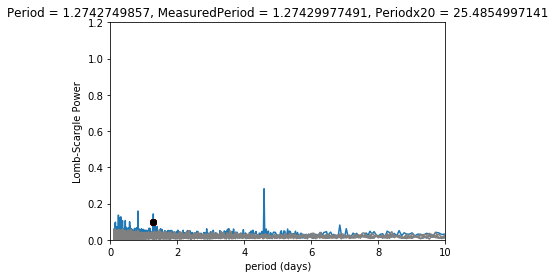

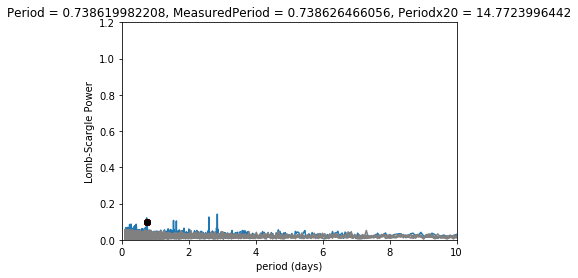

Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1572 steps
Finding optimal frequency:
Zooming-in on 5 candidate peaks:
 - Estimated peak width = 0.00182
 - Computing periods at 1000 steps
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1572 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


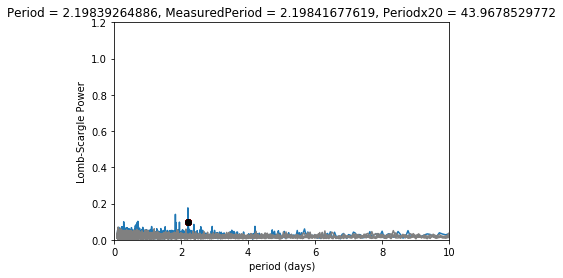

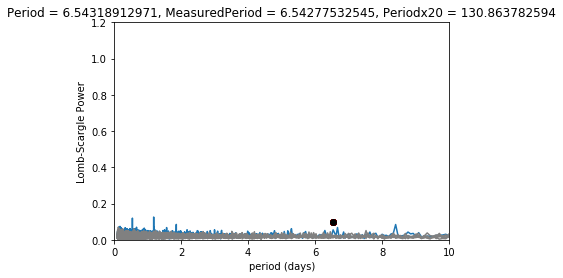

Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1572 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.00182
 - Using 5 steps per peak; omega_step = 0.000364
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1572 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


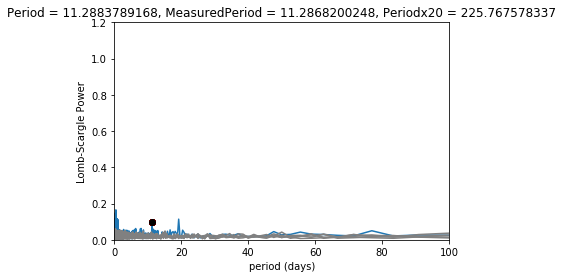

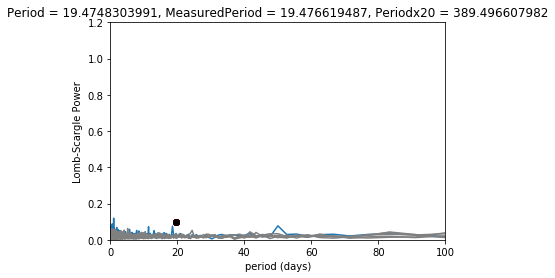

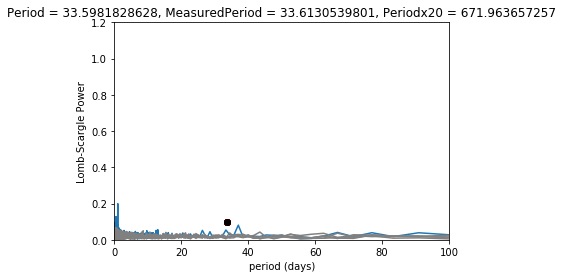

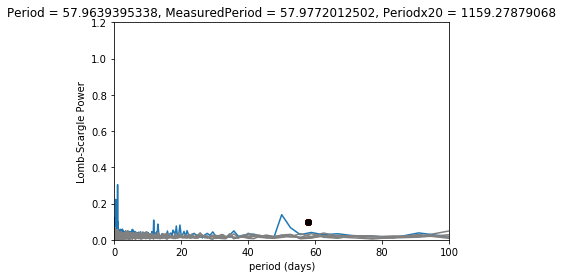

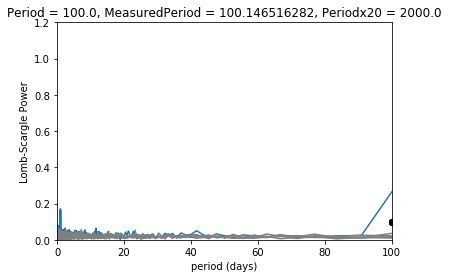

In [17]:
results = []
fullmeasuredPeriod = []
fullPeriod = []
fullPower = []
fullSigLevel = []
fullMag = []
#maglist = [20]*7
MagRangearray = np.linspace(17,24,maglength)
MagRange = [x for x in MagRangearray]
pool = Pool(processors)
for h in range(0,1):#len(MagRange)):
    maglist = [MagRange[h]]*7
    results.append(pool.map(partial(lombScargle, objectmag=MagRange[h]),FrangeLoop))
    

/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle ins

Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.5 to 10
 - Computing periods at 1616 steps
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  9.9 to 1.1e+02
 - Computing periods at 79 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  9.9 to 1.1e+02
 - Computing periods at 79 steps
Finding optimal frequency:
Zooming-in on 5 candidate peaks:
 - Estimated peak width = 0.037
 - Computing periods at 995 steps
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.5 to 10
 - Computing periods at 1616 steps
Finding optimal frequency:
 - Estimated peak width = 0.03

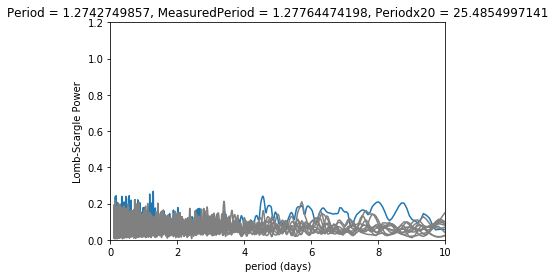

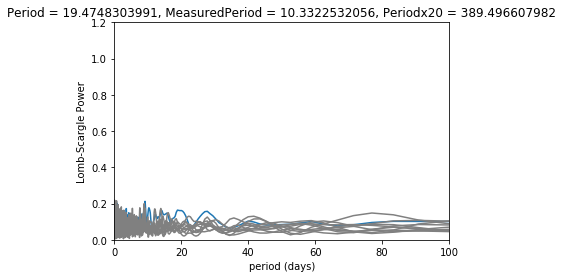

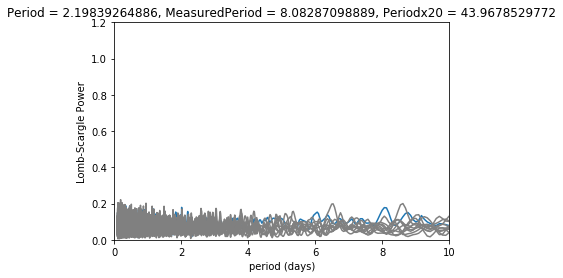

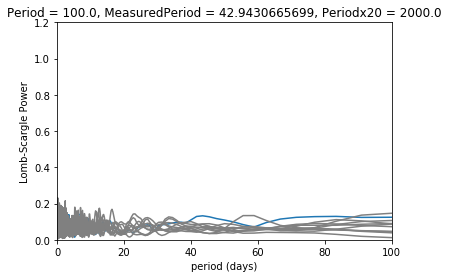

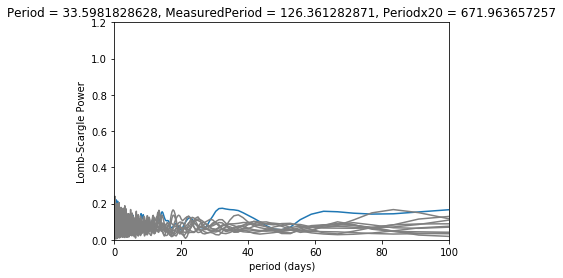

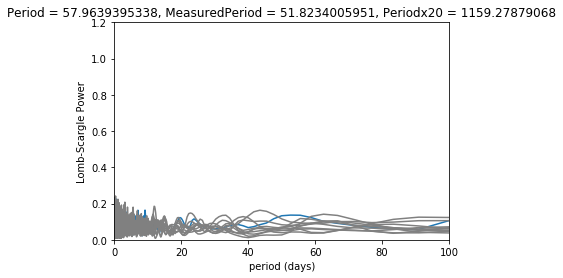

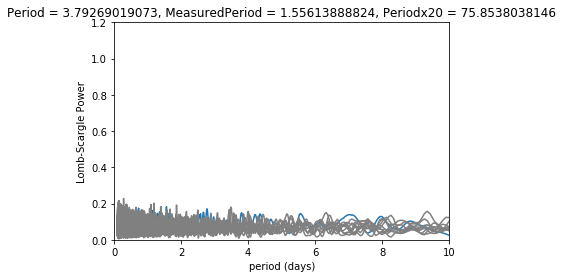

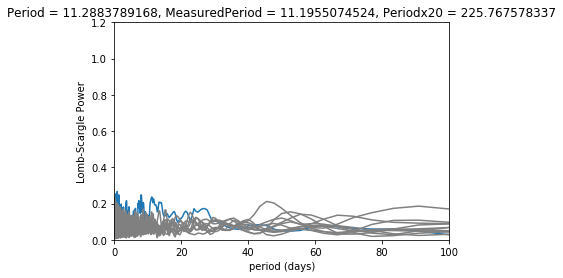

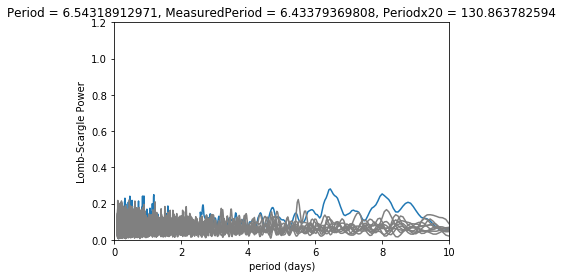

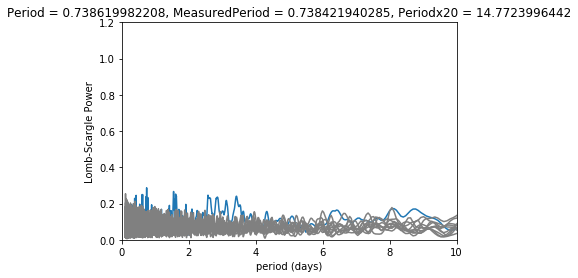

Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Zooming-in on 5 candidate peaks:
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Computing periods at 995 steps
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.0029 to 0.012
 - Computing periods at 222154 steps
Zooming-in on 5 candidate peaks:
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - Computing periods at 995 steps
 - User-specified period range:  0.0029 to 0.012
 - Computing periods at 222154 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.037
 - Using 5 steps per peak; omega_step = 0.0074
 - User-specified period range:  0.0029 t

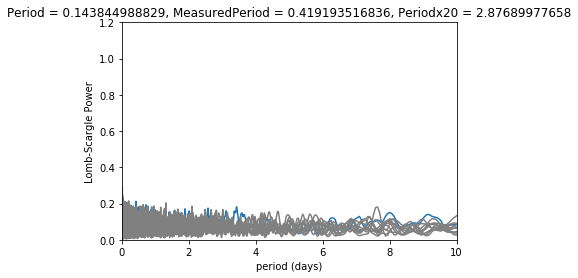

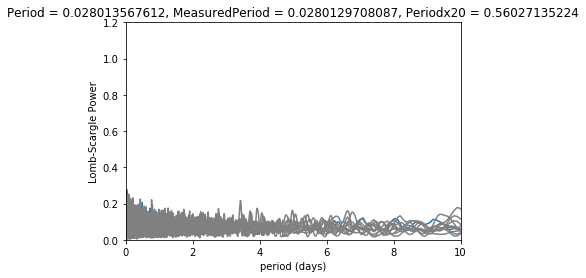

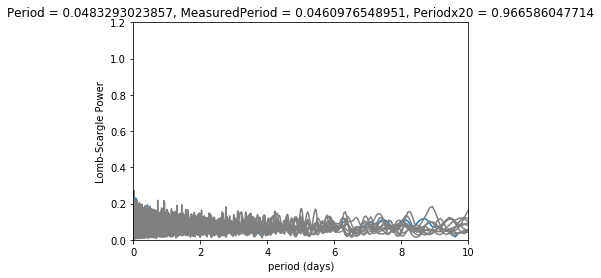

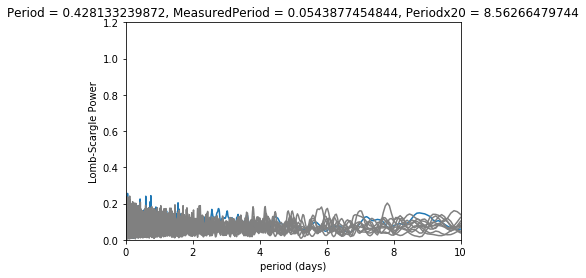

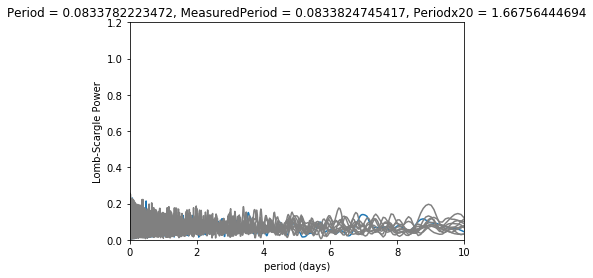

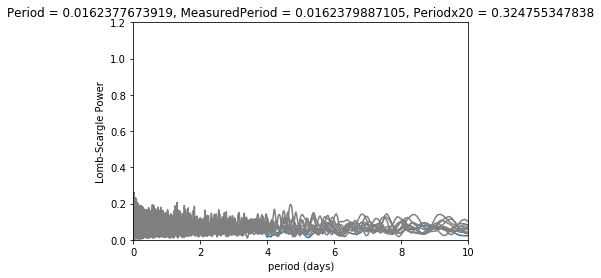

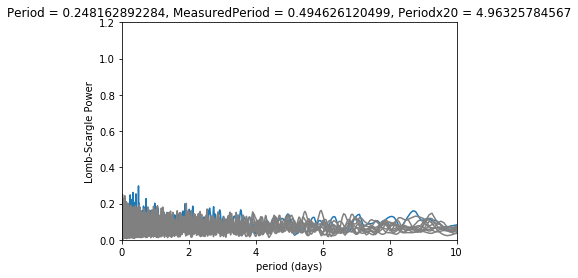

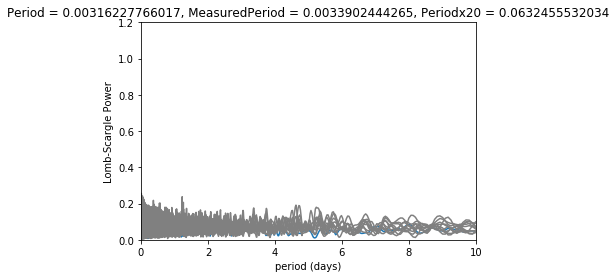

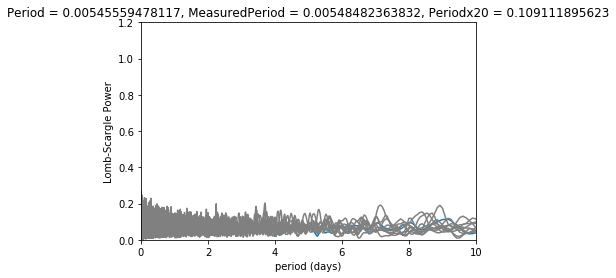

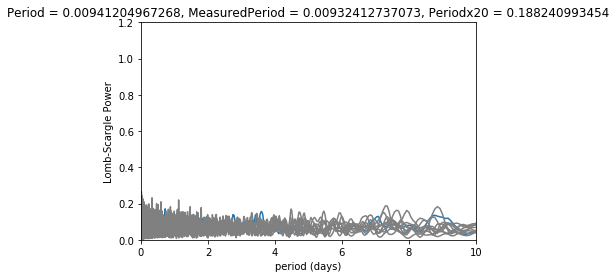

In [26]:
results = []
fullmeasuredPeriod = []
fullPeriod = []
fullPower = []
fullSigLevel = []
fullMag = []
#maglist = [20]*7
MagRangearray = np.linspace(17,24,maglength)
MagRange = [x for x in MagRangearray]
pool = Pool(processors)
for h in range(0,1):#len(MagRange)):
    maglist = [MagRange[h]]*7
    results.append(pool.map(partial(lombScargle, objectmag=MagRange[h]),FrangeLoop))
    

In [34]:
periodlist = []
fullmaglist = []
measuredperiodlist = []
siglist = []
powerlist = []
listnumberlist = []

for x in range(len(results)):
    for y in range(len(results[x])):
        fullmaglist.append(results[x][y][0])
        periodlist.append(results[x][y][1])
        measuredperiodlist.append(results[x][y][2])
        siglist.append(results[x][y][3])
        powerlist.append(results[x][y][4])
        listnumberlist.append(results[x][y][5])
    
    

In [26]:
File = open('minionfullresultsFile.txt','w')
File.write('fullPeriod = '+str(periodlist)+'\n\n'+
          'fullMag = '+str(fullmaglist)+'\n\n'+
          'fullmeasuredPeriod = '+str(measuredperiodlist)+'\n\n'+
          'fullPower = '+str(powerlist)+'\n\n'+
          'fullSigLevel = '+str(siglist)+'\n\n'
          'lisnumber = '+str(listnumberlist))
File.close() 


In [25]:
arraylength = 20
perioddifference = [(x-y)/y for x,y in zip(fullmeasuredPeriod,fullPeriod)]
perioddifferenceArray = np.asarray(perioddifference)
perioddifference = perioddifferenceArray.reshape(-1,arraylength)
perioddifference = perioddifference.tolist()

In [43]:
periodlist

[0.0031622776601683798,
 0.0054555947811685199,
 0.0094120496726806703,
 0.016237767391887217,
 0.028013567611988671,
 0.048329302385717518,
 0.083378222347178912,
 0.14384498882876623,
 0.24816289228368255,
 0.42813323987193919,
 0.73861998220793579,
 1.2742749857031335,
 2.1983926488622894,
 3.7926901907322494,
 6.5431891297129621,
 11.288378916846883,
 19.474830399087551,
 33.59818286283781,
 57.963939533849604,
 100.0]

In [24]:
twenty = [20*x for x in periodlist]

In [44]:
measuredperiodlist

[0.0033310116605744836,
 0.0054827642104026122,
 0.0094120715495941767,
 0.016237808699781302,
 0.028823314483168043,
 0.040212126882004831,
 0.083369791429517504,
 0.062426891617225914,
 0.030105565639137879,
 0.42803886799201096,
 0.7377934824800626,
 1.2747881708251643,
 1.2227709847872363,
 0.78997479671758675,
 1.2154931596572729,
 11.314793887387557,
 19.188832467232512,
 34.460077506992349,
 27.96121252828803,
 100.738972135431]

In [56]:
difference = [((x-y)/y)*100 for x,y in zip(periodlist,measuredperiodlist)]

In [57]:
difference
#print(periodlist[1]-measuredperiodlist[1])

[-5.0655481757455938,
 -0.49554254371440909,
 -0.00023243462813863161,
 -0.0002543932795871644,
 -2.8093468280764164,
 20.185889514203168,
 0.010112676926313983,
 130.42151403398407,
 724.30901733686574,
 0.0220475024548436,
 0.11202318094420428,
 -0.040256501729116233,
 79.787766982777427,
 380.10268257812828,
 438.31558637137175,
 -0.23345516324534049,
 1.4904394644302563,
 -2.5011395983646603,
 107.30123729508571,
 -0.73355139502271516]

In [52]:
divisor = [(x/y) for x,y in zip(periodlist,measuredperiodlist)]

In [53]:
print(divisor)

[0.94934451824254407, 0.99504457456285589, 0.99999767565371867, 0.99999745606720414, 0.9719065317192358, 1.2018588951420317, 1.0001011267692632, 2.3042151403398408, 8.2430901733686568, 1.0002204750245485, 1.0011202318094421, 0.99959743498270881, 1.7978776698277743, 4.8010268257812827, 5.3831558637137169, 0.99766544836754656, 1.0149043946443026, 0.97498860401635346, 2.0730123729508572, 0.99266448604977287]


In [ ]:
for z in range(len(obs),objectmag=MagRange[0]):
    phase = [(day % (period*2))/(period*2) for day in obs[z]]
    pmag = [objectmag - t for t in amplitude]
    plt.plot(phase, pmag, 'o', markersize=4)
    plt.xlabel('Phase')
    plt.ylabel('Magnitude')
    plt.gca().invert_yaxis()
    plt.title('filter'+str(z)+', Period = '+str(period))#+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
    plt.show()